In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
gradAd = pd.read_csv('Graduate Admissions.csv')
gradAd.drop('Serial No.',axis = 1,inplace = True)
gradAd.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [39]:
def regression(x,y):
    perp = x.T.dot(y)
    val = np.linalg.inv(x.T.dot(x)).dot(perp)
    return val

In [119]:
def geterror(x,y,theta):
    upper = theta.copy()
    lower = theta.copy()
    i = 1
    prev = 1
    val = 0
    while True:
        upper[0] = upper[0] + i
        lower[0] = lower[0] - i
        band = y[(y<x.dot(upper)) & (y>x.dot(lower))]
        if band.shape[0]<x.shape[0]*0.95:
            if prev<0:
                prev = 1
                i = -i * 0.5
        elif band.shape[0]>x.shape[0]*0.95:
            if prev>0:
                prev = -1
                i = -i * 0.5
        else:
            val = band.shape[0]
            break
    return upper,lower,val

In [125]:
def standarderror(x,y,theta):
    val = y - x.dot(theta)
    num = val.T.dot(val)
    num /= (x.shape[0]-2)
    amt = x - x.mean()
    den = amt.T.dot(amt)
    return num / den[1][1]

# **GRE score needed for chance of admission 90%**

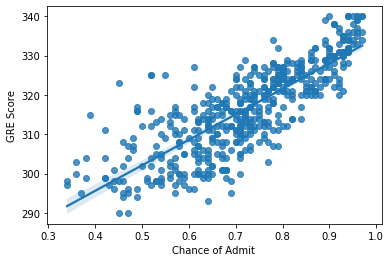

In [105]:
sns.regplot(x = 'Chance of Admit ',y = 'GRE Score', data = gradAd)

In [106]:
sub = pd.DataFrame(gradAd['Chance of Admit '])
sub.insert(loc = 0,column = 'bias',value=1)
x = np.array(sub)
y = np.array(gradAd['GRE Score'])

In [107]:
x.shape

(500, 2)

In [108]:
y = y.reshape(500,1)

In [109]:
theta = regression(x,y)

In [110]:
theta

array([[269.6667751 ],
       [ 64.85053468]])

In [121]:
np.array([1,0.9]).dot(theta)

array([328.03225631])

In [130]:
se = standarderror(x,y,theta)

In [131]:
se

array([[2.23713962]])

In [134]:
upper = theta.copy()
upper[1] = upper[1] + 1.96 * se
lower = theta.copy()
lower[1] = lower[1] - 1.96 * se

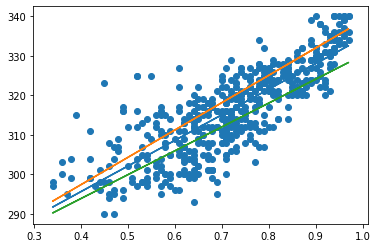

In [135]:
plt.scatter(gradAd['Chance of Admit '],gradAd['GRE Score'])
plt.plot(gradAd['Chance of Admit '],x.dot(theta))
plt.plot(gradAd['Chance of Admit '],x.dot(upper))
plt.plot(gradAd['Chance of Admit '],x.dot(lower))

In [116]:
np.array([1,0.9]).dot(theta)

array([328.03225631])

In [117]:
np.array([1,0.9]).dot(upper)

array([340.78225631])

In [118]:
np.array([1,0.9]).dot(lower)

array([315.28225631])

# **TOEFL score needed for chance of admission 90%**

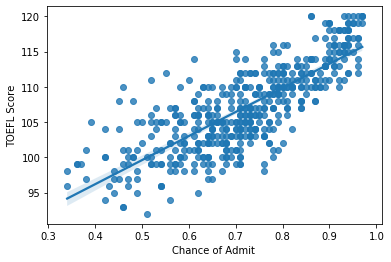

In [88]:
sns.regplot(x = 'Chance of Admit ', y = 'TOEFL Score', data = gradAd)

In [89]:
x = np.array(sub)
y = np.array(gradAd['TOEFL Score'])
y = y.reshape(500,1)

In [90]:
theta = regression(x,y)

In [91]:
theta


array([[82.55338103],
       [34.13780442]])

In [92]:
np.array([1,0.9]).dot(theta)

array([113.27740502])

In [93]:
upper,lower,val = geterror(x,y,theta)

In [94]:
val

475

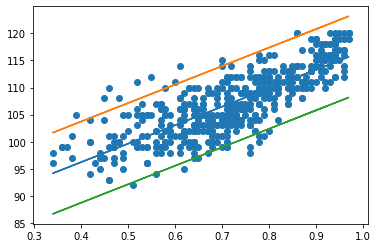

In [97]:
plt.scatter(gradAd['Chance of Admit '],gradAd['TOEFL Score'])
plt.plot(gradAd['Chance of Admit '],x.dot(theta))
plt.plot(gradAd['Chance of Admit '],x.dot(upper))
plt.plot(gradAd['Chance of Admit '],x.dot(lower))

In [98]:
np.array([1,0.9]).dot(theta)
np.array([1,0.9]).dot(lower)

array([105.77740502])

In [99]:
np.array([1,0.9]).dot(upper)


array([120.77740502])

In [100]:
np.array([1,0.9]).dot(lower)

array([105.77740502])